## Visualization for best models

In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import random


models_path = Path("D:\\studia\\semestr_8\\zespolowy_projekt_badawczy\\qgis-yolo-plugin\\models")
CLASS_COLORS = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (255, 0, 255)
]


def load_model(model_name):
    model_path = models_path / model_name
    return YOLO(str(model_path))


def draw_boxes_on_image(img, result, class_names, class_colors=CLASS_COLORS):
    for box, cls, conf in zip(result.boxes.xyxy, result.boxes.cls, result.boxes.conf):
        cls_id = int(cls) % len(class_colors)
        color = class_colors[cls_id]
        x1, y1, x2, y2 = map(int, box)
        label = f"{class_names[int(cls)]}: {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2, cv2.LINE_AA)

    return img


def prepare_and_show_grid(images, results, class_names, cols=4, img_size=800):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(cols * 4, rows * 4))

    for i, (img_path, result) in enumerate(zip(images, results)):
        img = cv2.imread(str(img_path))
        img = draw_boxes_on_image(img, result, class_names)
        img = cv2.resize(img, (img_size, img_size))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img_rgb)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


def show_yolo_predictions_grid_random(model_name, images_path, num_images=16, cols=4, img_size=800):
    image_files = [f for f in images_path.iterdir()]
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    model = load_model(model_name)
    results = model([str(img) for img in selected_images], verbose=False)
    prepare_and_show_grid(selected_images, results, model.names, cols, img_size)


def show_yolo_predictions_grid_list(model_name, image_list, cols=4, img_size=800):
    model = load_model(model_name)
    results = model([str(img) for img in image_list], verbose=False)
    prepare_and_show_grid(image_list, results, model.names, cols, img_size)


### DOTANA without ships

Best models:
- DOTANA_no_ships_yolo12x map50_95: 0.6039
- DOTANA_no_ships_yolo11x map50_95: 0.6030

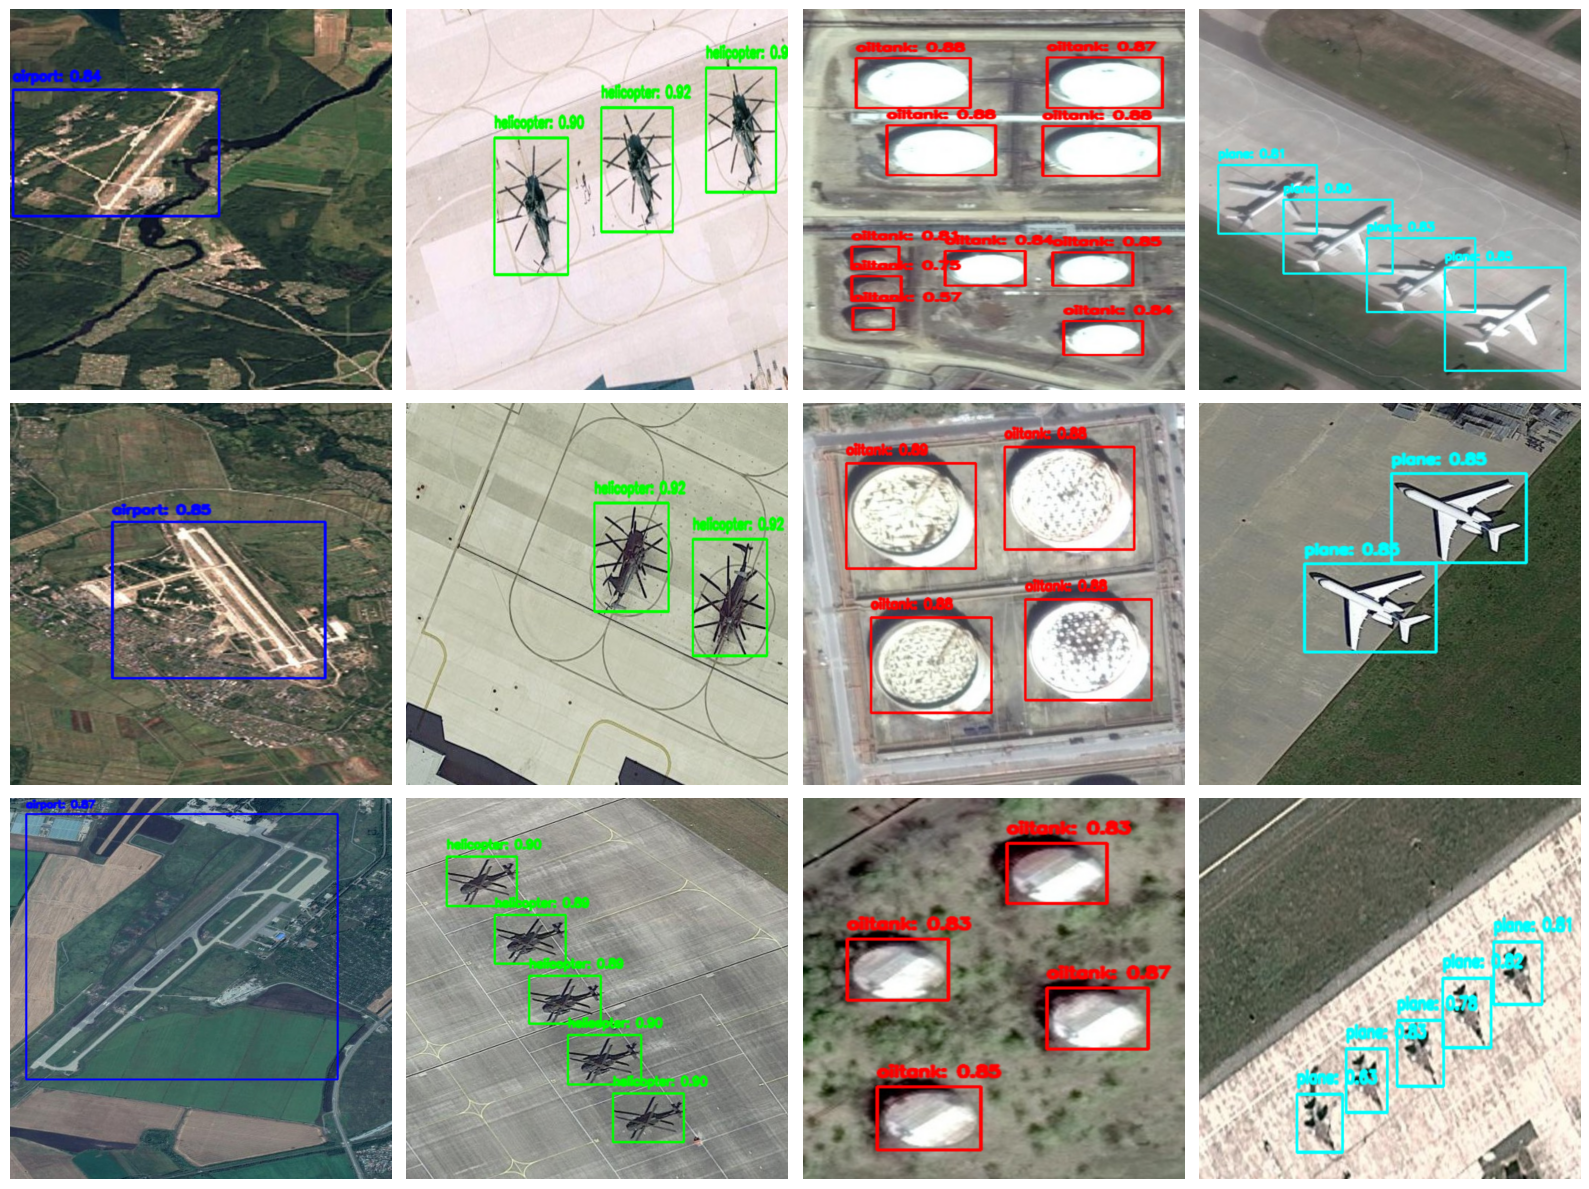

In [ ]:
images_path = Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images")

# show_yolo_predictions_grid_random("DOTANA_no_ships_yolo12x.pt", images_path, num_images=12, cols=3)
# show_yolo_predictions_grid_random("DOTANA_no_ships_yolo11x.pt", images_path, num_images=12, cols=3)

images = [
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\airbase_8828.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\helicopter_11117.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\oiltank_12695.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\plane_15366.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\airbase_8805.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\helicopter_11159.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\oiltank_11810.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\plane_15153.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\airbase_8991.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\helicopter_11265.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\oiltank_11898.jpg"),
    Path("D:\\stuff\\datasets\\DOTANA\\DOTANA_no_ships\\test\\images\\plane_15057.jpg"),
]
show_yolo_predictions_grid_list("DOTANA_no_ships_yolo12x.pt", images, cols=4)

### SHIPS dataset

Best models:
- ships_yolo11l.pt map50_95: 0.7548 
- ships_yolo11s.pt map50_95: 0.7543

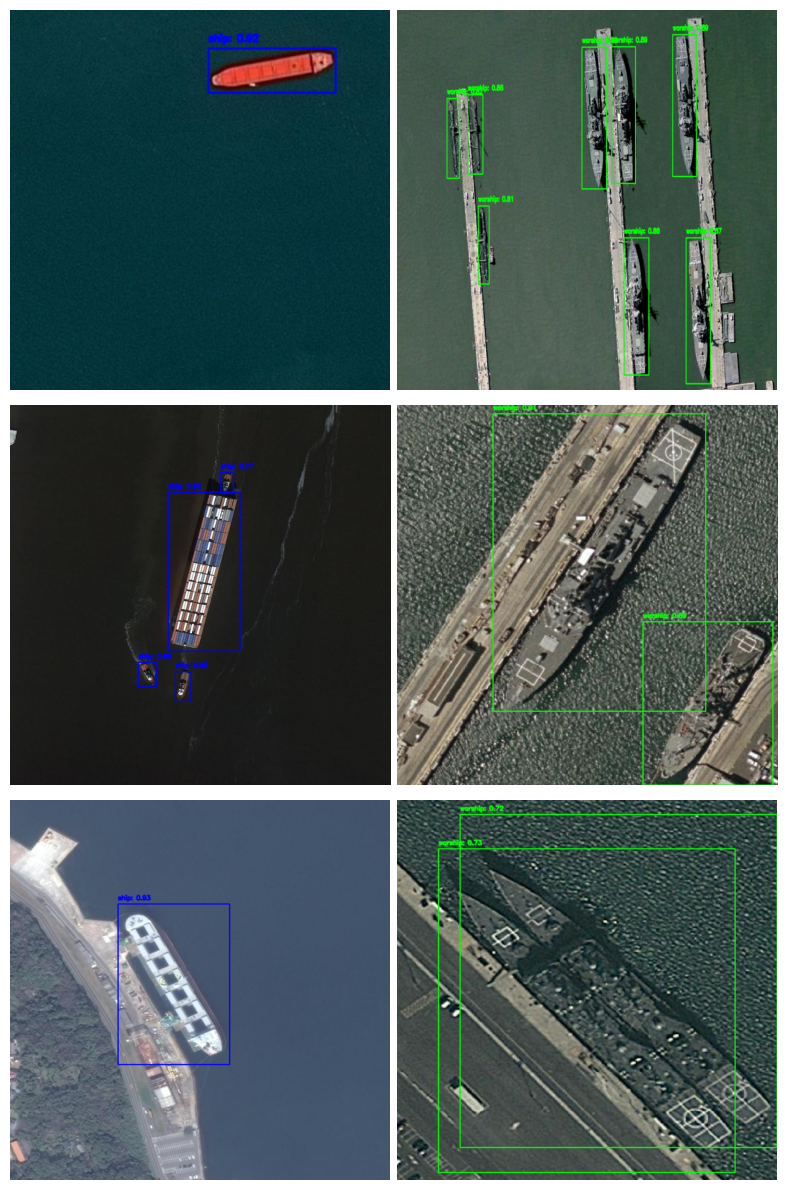

In [20]:
images_path = Path("D:\\stuff\\datasets\\ShipRSImageNet\\ShipRSImageNet\\test\\images")

# show_yolo_predictions_grid_random("ships_yolo11l.pt", images_path, num_images=12, cols=3)
# show_yolo_predictions_grid_random("ships_yolo11s.pt", images_path, num_images=12, cols=3)

images = [
    Path("D:\\stuff\\datasets\\ShipRSImageNet\\ShipRSImageNet\\test\\images\\1d92b652d.jpg"),
    Path("D:\\stuff\\datasets\\ShipRSImageNet\\ShipRSImageNet\\test\\images\\100001093.jpg"),
    Path("D:\\stuff\\datasets\\ShipRSImageNet\\ShipRSImageNet\\test\\images\\000210.jpg"),
    Path("D:\\stuff\\datasets\\ShipRSImageNet\\ShipRSImageNet\\test\\images\\002085.jpg"),
    Path("D:\\stuff\\datasets\\ShipRSImageNet\\ShipRSImageNet\\test\\images\\001318.jpg"),
    Path("D:\\stuff\\datasets\\ShipRSImageNet\\ShipRSImageNet\\test\\images\\001659.jpg"),
]
show_yolo_predictions_grid_list("ships_yolo11s.pt", images, cols=2)